# Stock Bubble Analysis


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import  pandas_datareader as pdr
import datetime
from sklearn.preprocessing import MinMaxScaler
import requests # data from api
from matplotlib import pyplot as plot
%matplotlib inline
import dateutil
from pandas.tseries.offsets import DateOffset
import plotly.express as px

In [2]:
start=datetime.datetime(1970,1,1)
end=datetime.datetime(2022,4,29)

In [3]:
dji=pdr.DataReader("^DJI",'yahoo',start='1970-01-01', 
                       end='2022-04-29')

In [4]:
spy=pdr.DataReader("SPY",'yahoo',start='1970-01-01', 
                       end='2022-04-29')

In [5]:
ndaq=pdr.DataReader("^IXIC",'yahoo',start='1970-01-01', 
                       end='2022-04-29')

In [6]:
dji

High           Low          Open         Close     Volume  \
Date                                                                            
1992-01-02   3172.629883   3139.310059   3152.100098   3172.399902   23550000   
1992-01-03   3210.639893   3165.919922   3172.399902   3201.500000   23620000   
1992-01-06   3213.330078   3191.860107   3201.500000   3200.100098   27280000   
1992-01-07   3210.199951   3184.479980   3200.100098   3204.800049   25510000   
1992-01-08   3229.199951   3185.820068   3204.800049   3203.899902   29040000   
...                  ...           ...           ...           ...        ...   
2022-04-25  34106.011719  33323.371094  33731.648438  34049.460938  416900000   
2022-04-26  33909.511719  33230.949219  33907.488281  33240.179688  400020000   
2022-04-27  33697.179688  33108.890625  33450.921875  33301.929688  447230000   
2022-04-28  34054.789062  33248.460938  33425.960938  33916.390625  440380000   
2022-04-29  33919.589844  32913.148438  33787.011719  32977.210938  501560000   

               Adj Close  
Date                      
1992-01-02   3172.399902  
1992-01-03   3201.500000  
1992-01-06   3200.100098  
1992-01-07   3204.800049  
1992-01-08   3203.899902  
...                  ...  
2022-04-25  34049.460938  
2022-04-26  33240.179688  
2022-04-27  33301.929688  
2022-04-28  33916.390625  
2022-04-29  32977.210938  

[7640 rows x 6 columns]

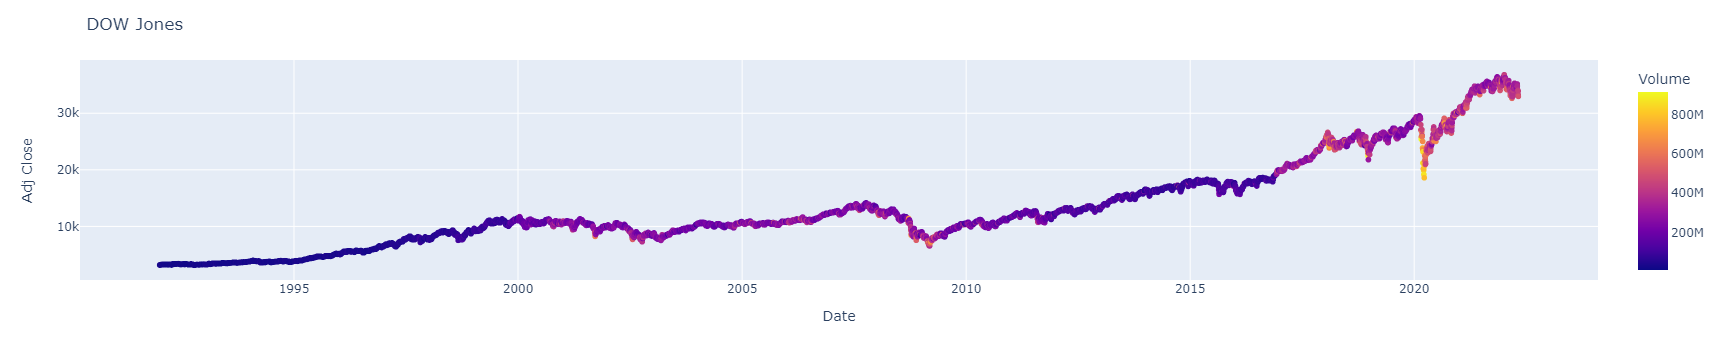

In [7]:
fig1 = px.scatter(dji, x=dji.index, y="Adj Close", color="Volume"
                )
fig1.update_layout(title="DOW Jones")
fig1.show()

In [8]:
spy

High         Low        Open       Close       Volume  \
Date                                                                      
1993-01-29   43.968750   43.750000   43.968750   43.937500    1003200.0   
1993-02-01   44.250000   43.968750   43.968750   44.250000     480500.0   
1993-02-02   44.375000   44.125000   44.218750   44.343750     201300.0   
1993-02-03   44.843750   44.375000   44.406250   44.812500     529400.0   
1993-02-04   45.093750   44.468750   44.968750   45.000000     531500.0   
...                ...         ...         ...         ...          ...   
2022-04-25  428.690002  418.839996  423.670013  428.510010  119647700.0   
2022-04-26  426.040009  416.070007  425.829987  416.100006  103996300.0   
2022-04-27  422.920013  415.010010  417.239990  417.269989  122030000.0   
2022-04-28  429.640015  417.600006  422.290009  427.809998  105449100.0   
2022-04-29  425.869995  411.209991  423.589996  412.000000  145187900.0   

             Adj Close  
Date                    
1993-01-29   25.547977  
1993-02-01   25.729692  
1993-02-02   25.784203  
1993-02-03   26.056765  
1993-02-04   26.165771  
...                ...  
2022-04-25  428.510010  
2022-04-26  416.100006  
2022-04-27  417.269989  
2022-04-28  427.809998  
2022-04-29  412.000000  

[7367 rows x 6 columns]

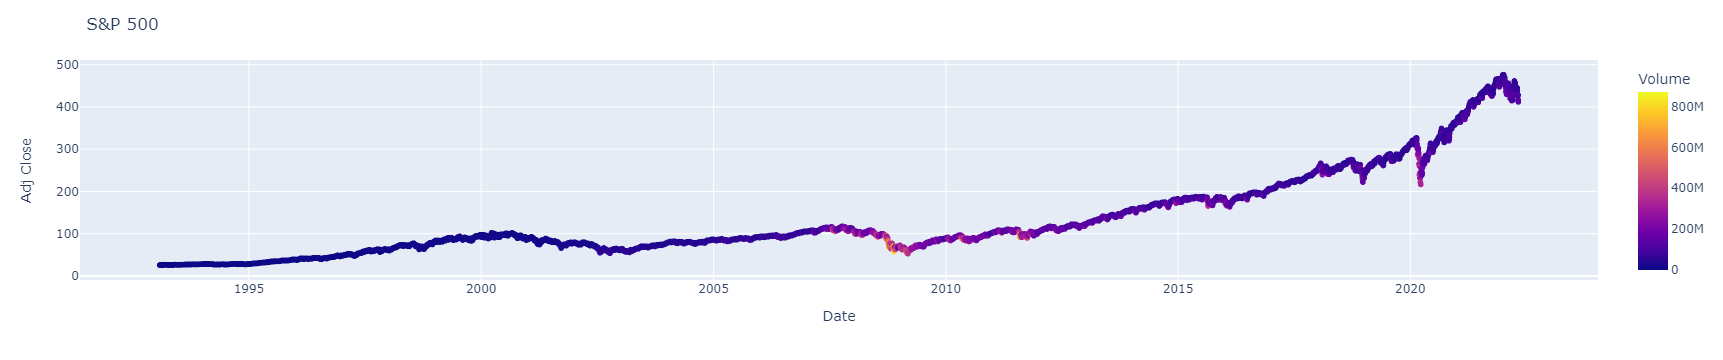

In [9]:
fig1 = px.scatter(spy, x=spy.index, y="Adj Close", color="Volume"
                )
fig1.update_layout(title="S&P 500")
fig1.show()

In [10]:
ndaq

High           Low          Open         Close  \
Date                                                                 
1971-02-05    100.000000    100.000000    100.000000    100.000000   
1971-02-08    100.839996    100.839996    100.839996    100.839996   
1971-02-09    100.760002    100.760002    100.760002    100.760002   
1971-02-10    100.690002    100.690002    100.690002    100.690002   
1971-02-11    101.449997    101.449997    101.449997    101.449997   
...                  ...           ...           ...           ...   
2022-04-25  13011.450195  12722.589844  12749.169922  13004.849609   
2022-04-26  12918.040039  12490.740234  12918.040039  12490.740234   
2022-04-27  12703.790039  12430.900391  12500.879883  12488.929688   
2022-04-28  12948.519531  12487.860352  12712.860352  12871.530273   
2022-04-29  12861.830078  12315.740234  12710.419922  12334.639648   

                Volume     Adj Close  
Date                                  
1971-02-05           0    100.000000  
1971-02-08           0    100.839996  
1971-02-09           0    100.760002  
1971-02-10           0    100.690002  
1971-02-11           0    101.449997  
...                ...           ...  
2022-04-25  4827790000  13004.849609  
2022-04-26  5136770000  12490.740234  
2022-04-27  4773290000  12488.929688  
2022-04-28  5030570000  12871.530273  
2022-04-29  4719290000  12334.639648  

[12922 rows x 6 columns]

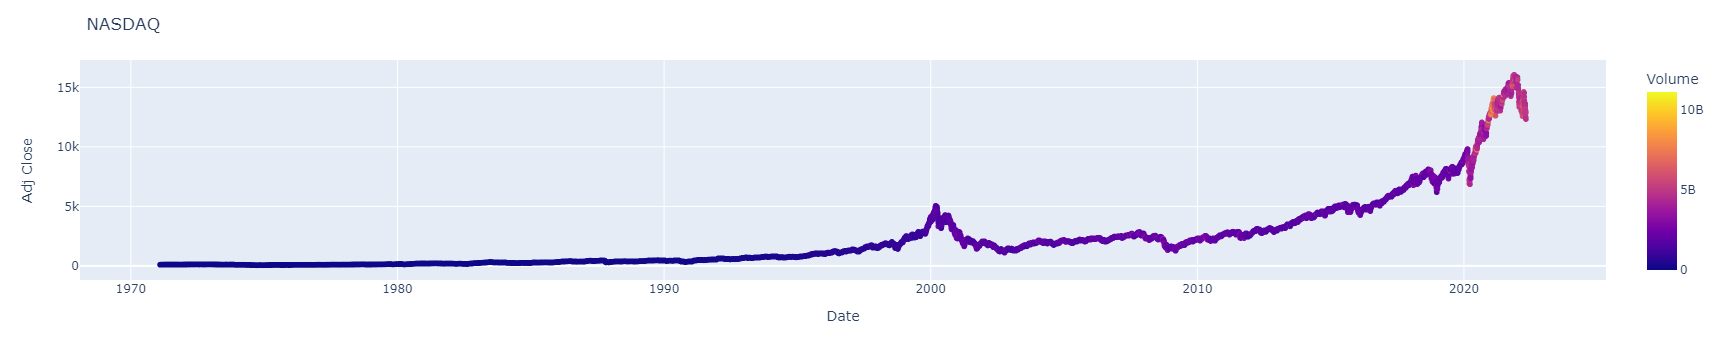

In [11]:
fig1 = px.scatter(ndaq, x=ndaq.index, y="Adj Close", color="Volume"
                )
fig1.update_layout(title="NASDAQ")
fig1.show()

In [12]:
m=ndaq.merge(spy,on="Date")
m.merge(dji,on="Date")

High_x         Low_x        Open_x       Close_x  \
Date                                                                 
1993-01-29    697.179993    693.840027    696.960022    696.340027   
1993-02-01    702.140015    696.770020    697.979980    701.770020   
1993-02-02    705.130005    700.979980    702.250000    705.119995   
1993-02-03    709.340027    706.030029    707.679993    708.669983   
1993-02-04    711.280029    706.739990    710.030029    708.849976   
...                  ...           ...           ...           ...   
2022-04-25  13011.450195  12722.589844  12749.169922  13004.849609   
2022-04-26  12918.040039  12490.740234  12918.040039  12490.740234   
2022-04-27  12703.790039  12430.900391  12500.879883  12488.929688   
2022-04-28  12948.519531  12487.860352  12712.860352  12871.530273   
2022-04-29  12861.830078  12315.740234  12710.419922  12334.639648   

              Volume_x   Adj Close_x      High_y       Low_y      Open_y  \
Date                                                                       
1993-01-29   236950000    696.340027   43.968750   43.750000   43.968750   
1993-02-01   213940000    701.770020   44.250000   43.968750   43.968750   
1993-02-02   254080000    705.119995   44.375000   44.125000   44.218750   
1993-02-03   291730000    708.669983   44.843750   44.375000   44.406250   
1993-02-04   284660000    708.849976   45.093750   44.468750   44.968750   
...                ...           ...         ...         ...         ...   
2022-04-25  4827790000  13004.849609  428.690002  418.839996  423.670013   
2022-04-26  5136770000  12490.740234  426.040009  416.070007  425.829987   
2022-04-27  4773290000  12488.929688  422.920013  415.010010  417.239990   
2022-04-28  5030570000  12871.530273  429.640015  417.600006  422.290009   
2022-04-29  4719290000  12334.639648  425.869995  411.209991  423.589996   

               Close_y     Volume_y  Adj Close_y          High           Low  \
Date                                                                           
1993-01-29   43.937500    1003200.0    25.547977   3315.159912   3298.949951   
1993-02-01   44.250000     480500.0    25.729692   3332.449951   3309.489990   
1993-02-02   44.343750     201300.0    25.784203   3334.879883   3318.669922   
1993-02-03   44.812500     529400.0    26.056765   3379.459961   3328.899902   
1993-02-04   45.000000     531500.0    26.165771   3423.770020   3374.060059   
...                ...          ...          ...           ...           ...   
2022-04-25  428.510010  119647700.0   428.510010  34106.011719  33323.371094   
2022-04-26  416.100006  103996300.0   416.100006  33909.511719  33230.949219   
2022-04-27  417.269989  122030000.0   417.269989  33697.179688  33108.890625   
2022-04-28  427.809998  105449100.0   427.809998  34054.789062  33248.460938   
2022-04-29  412.000000  145187900.0   412.000000  33919.589844  32913.148438   

                    Open         Close     Volume     Adj Close  
Date                                                             
1993-01-29   3306.300049   3310.000000   22060000   3310.000000  
1993-02-01   3310.000000   3332.199951   27910000   3332.199951  
1993-02-02   3332.199951   3328.699951   27290000   3328.699951  
1993-02-03   3328.899902   3373.800049   35290000   3373.800049  
1993-02-04   3374.100098   3416.699951   36250000   3416.699951  
...                  ...           ...        ...           ...  
2022-04-25  33731.648438  34049.460938  416900000  34049.460938  
2022-04-26  33907.488281  33240.179688  400020000  33240.179688  
2022-04-27  33450.921875  33301.929688  447230000  33301.929688  
2022-04-28  33425.960938  33916.390625  440380000  33916.390625  
2022-04-29  33787.011719  32977.210938  501560000  32977.210938  

[7367 rows x 18 columns]

In [13]:
m.index = pd.to_datetime(m.index)
Merged_INDEX=m.resample('1M').mean()
Merged_INDEX.index.names = ['DATE']
Merged_INDEX

High_x         Low_x        Open_x       Close_x  \
DATE                                                                 
1993-01-31    697.179993    693.840027    696.960022    696.340027   
1993-02-28    686.265265    678.256312    683.346844    681.709476   
1993-03-31    686.753036    681.803910    683.690002    684.490866   
1993-04-30    669.068574    662.934762    666.510466    665.329526   
1993-05-31    687.744507    682.554996    684.709000    686.451004   
...                  ...           ...           ...           ...   
2021-12-31  15603.315385  15328.491388  15480.551358  15474.431729   
2022-01-31  14744.223486  14347.426074  14591.800928  14531.377490   
2022-02-28  14061.115337  13718.413189  13884.980520  13898.728413   
2022-03-31  13768.996943  13454.266092  13621.587806  13623.262950   
2022-04-30  13596.793408  13276.163574  13479.614502  13394.163037   

                Volume_x   Adj Close_x      High_y       Low_y      Open_y  \
DATE                                                                         
1993-01-31  2.369500e+08    696.340027   43.968750   43.750000   43.968750   
1993-02-28  2.617689e+08    681.709476   44.449013   44.049342   44.305921   
1993-03-31  2.225717e+08    684.490866   45.270380   44.937500   45.082880   
1993-04-30  2.327143e+08    665.329526   44.566964   44.215774   44.446429   
1993-05-31  2.553230e+08    686.451004   44.793750   44.465625   44.625000   
...                  ...           ...         ...         ...         ...   
2021-12-31  4.711066e+09  15474.431729  469.007270  462.924093  466.088186   
2022-01-31  4.984170e+09  14531.377490  460.348502  451.089499  456.829501   
2022-02-28  4.689677e+09  13898.728413  446.438949  438.255790  442.159475   
2022-03-31  5.662041e+09  13623.262950  441.545215  434.146085  437.966956   
2022-04-30  4.799715e+09  13394.163037  442.620500  434.688002  439.526999   

               Close_y      Volume_y  Adj Close_y  
DATE                                               
1993-01-31   43.937500  1.003200e+06    25.547977  
1993-02-28   44.291118  2.851368e+05    25.753595  
1993-03-31   45.119565  1.312696e+05    26.283676  
1993-04-30   44.357143  1.284381e+05    25.913796  
1993-05-31   44.662500  9.040000e+04    26.092188  
...                ...           ...          ...  
2021-12-31  466.405002  8.761063e+07   464.078190  
2022-01-31  455.848000  1.242584e+08   454.436241  
2022-02-28  442.543688  1.209461e+08   441.173133  
2022-03-31  438.153481  1.035187e+08   437.404241  
2022-04-30  437.821501  9.282271e+07   437.821501  

[352 rows x 12 columns]

## Economic Data

In [14]:
def get_fred_data(param_list, start_date, end_date):
  df = pdr.DataReader(param_list, 'fred', start_date, end_date)
  return df.reset_index()

In [15]:
df = get_fred_data(param_list=['MEDCPIM158SFRBCLE'], 
                   start_date='1970-01-01', 
                   end_date='2022-05-01')


In [16]:
df.set_index('DATE', inplace=True)
df.index = pd.to_datetime(df.index)
df_CPI=df.resample('1M').mean()
df_CPI

MEDCPIM158SFRBCLE
DATE                         
1983-01-31           5.014653
1983-02-28           4.952545
1983-03-31           3.612261
1983-04-30           4.828054
1983-05-31           3.767326
...                       ...
2021-12-31           5.275819
2022-01-31           7.141525
2022-02-28           6.506399
2022-03-31           5.902594
2022-04-30           6.527993

[472 rows x 1 columns]

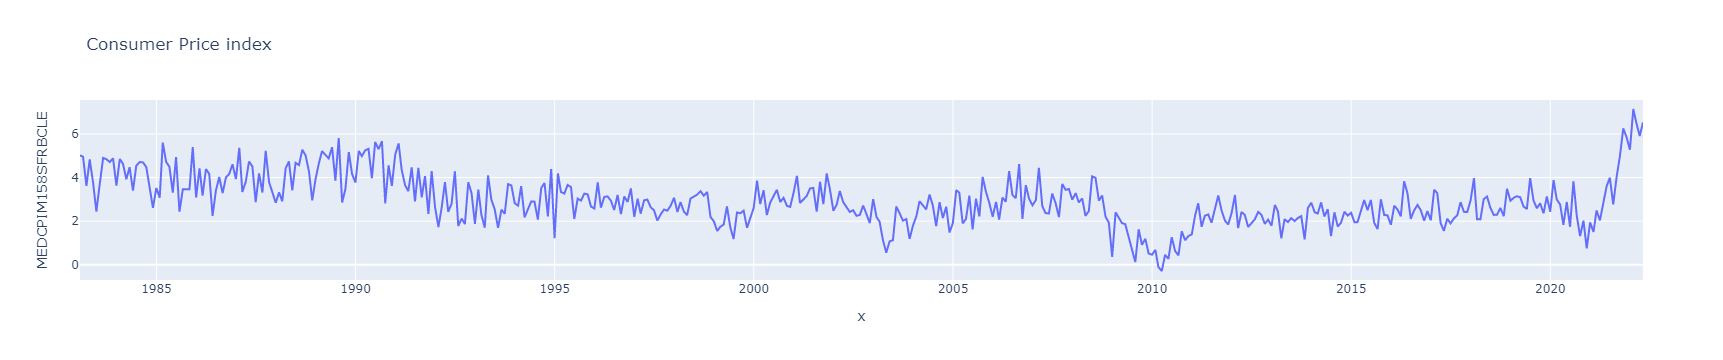

In [17]:
fig = px.line(df, x=df_CPI.index, y="MEDCPIM158SFRBCLE", title='Consumer Price index')
fig.show()

In [18]:
df1 = get_fred_data(param_list=['EFFR'], 
                   start_date='1970-01-01', 
                   end_date='2022-05-01')
df2=df1.dropna()


In [19]:
df2.set_index('DATE', inplace=True)
df2.index = pd.to_datetime(df2.index)
df_RATE=df2.resample('1M').mean()
df_RATE

EFFR
DATE                
2000-07-31  6.518500
2000-08-31  6.502609
2000-09-30  6.514500
2000-10-31  6.521905
2000-11-30  6.523333
...              ...
2021-12-31  0.079565
2022-01-31  0.080000
2022-02-28  0.080000
2022-03-31  0.199565
2022-04-30  0.330000

[262 rows x 1 columns]

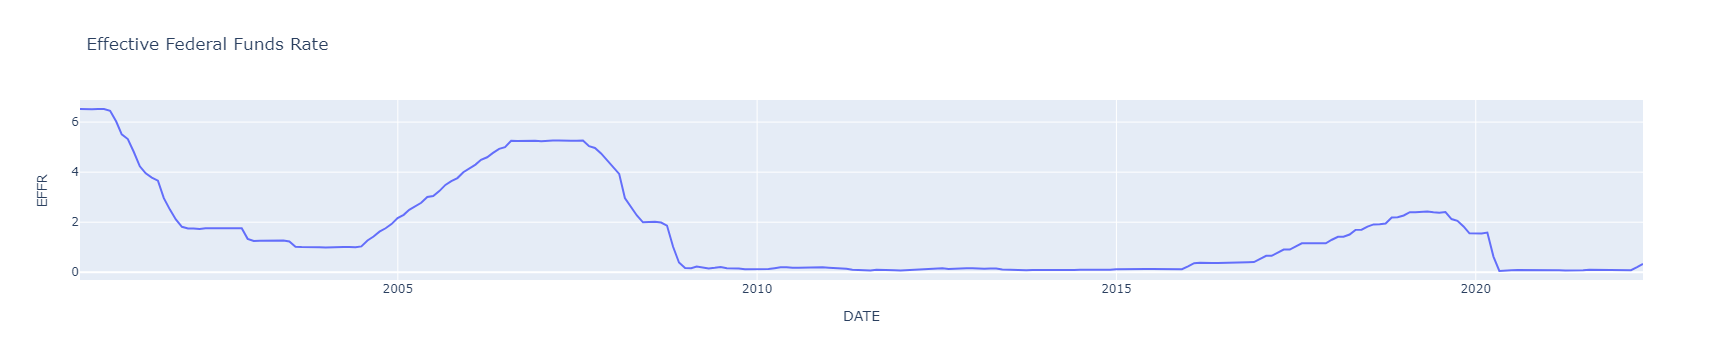

In [20]:
fig = px.line(df_RATE, x=df_RATE.index, y="EFFR", title='Effective Federal Funds Rate')
fig.show()

In [21]:
df_CURR = get_fred_data(param_list=['CURRCIR'], 
                   start_date='1970-01-01', 
                   end_date='2022-05-01') 

In [22]:
df_CURR.set_index('DATE', inplace=True)
df_CURR.index = pd.to_datetime(df_CURR.index)
df_CURR=df_CURR.resample('1M').mean()
df_CURR

CURRCIR
DATE                
1970-01-31    52.737
1970-02-28    52.112
1970-03-31    52.411
1970-04-30    52.867
1970-05-31    53.490
...              ...
2021-12-31  2223.870
2022-01-31  2233.621
2022-02-28  2232.107
2022-03-31  2257.649
2022-04-30  2269.832

[628 rows x 1 columns]

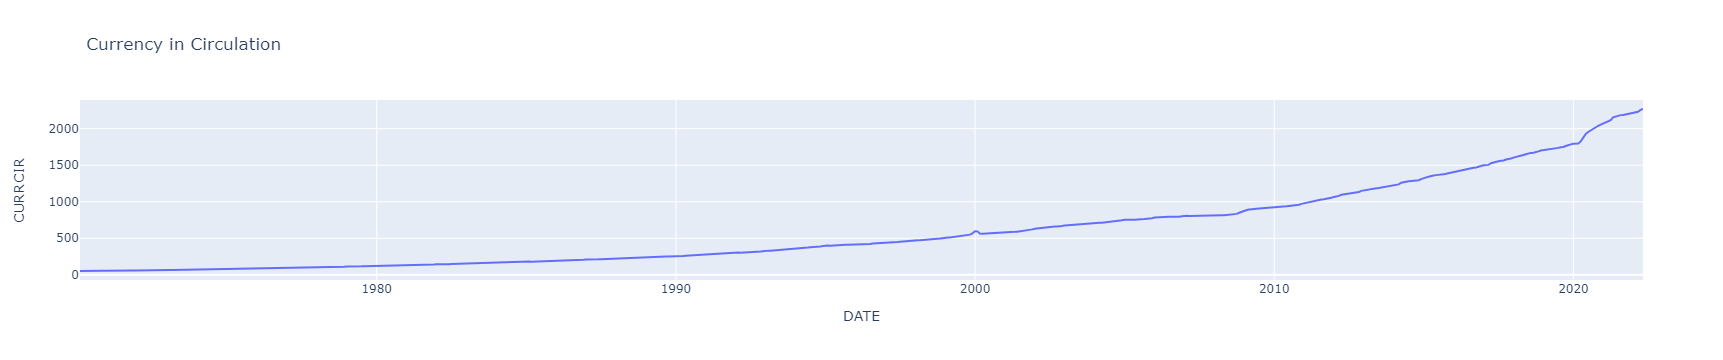

In [23]:
fig = px.line(df_CURR, x=df_CURR.index, y="CURRCIR", title='Currency in Circulation')
fig.show()

## Analysis

In [24]:
df_ECON=df_CPI.merge(df_RATE,on="DATE")
df_ECON=df_ECON.merge(df_CURR,on="DATE")
df_ECON=Clust=df_ECON.merge(Merged_INDEX,on="DATE")
df_ECON

MEDCPIM158SFRBCLE      EFFR   CURRCIR        High_x         Low_x  \
DATE                                                                            
2000-07-31           3.436363  6.518500   571.216   4067.814526   3967.370020   
2000-08-31           2.875701  6.502609   569.313   3943.926970   3863.963931   
2000-09-30           3.068734  6.514500   570.677   3941.259521   3828.809021   
2000-10-31           2.701073  6.521905   571.480   3416.571378   3262.357722   
2000-11-30           2.651774  6.523333   575.002   3126.129511   3012.396636   
...                       ...       ...       ...           ...           ...   
2021-12-31           5.275819  0.079565  2223.870  15603.315385  15328.491388   
2022-01-31           7.141525  0.080000  2233.621  14744.223486  14347.426074   
2022-02-28           6.506399  0.080000  2232.107  14061.115337  13718.413189   
2022-03-31           5.902594  0.199565  2257.649  13768.996943  13454.266092   
2022-04-30           6.527993  0.330000  2269.832  13596.793408  13276.163574   

                  Open_x       Close_x      Volume_x   Adj Close_x  \
DATE                                                                 
2000-07-31   4029.583984   4017.684985  1.545806e+09   4017.684985   
2000-08-31   3895.663479   3909.596956  1.444475e+09   3909.596956   
2000-09-30   3898.305981   3875.822034  1.736366e+09   3875.822034   
2000-10-31   3351.607688   3333.824552  2.005864e+09   3333.824552   
2000-11-30   3083.830497   3055.415213  1.818186e+09   3055.415213   
...                  ...           ...           ...           ...   
2021-12-31  15480.551358  15474.431729  4.711066e+09  15474.431729   
2022-01-31  14591.800928  14531.377490  4.984170e+09  14531.377490   
2022-02-28  13884.980520  13898.728413  4.689677e+09  13898.728413   
2022-03-31  13621.587806  13623.262950  5.662041e+09  13623.262950   
2022-04-30  13479.614502  13394.163037  4.799715e+09  13394.163037   

                High_y       Low_y      Open_y     Close_y      Volume_y  \
DATE                                                                       
2000-07-31  148.626563  146.714844  147.787500  147.502344  5.339005e+06   
2000-08-31  149.605299  147.936141  148.586277  148.963315  4.450674e+06   
2000-09-30  148.290625  146.115625  147.460938  146.927344  5.660150e+06   
2000-10-31  140.847301  137.594460  139.364347  139.203835  8.108745e+06   
2000-11-30  139.268601  136.781994  138.254464  137.783482  7.461900e+06   
...                ...         ...         ...         ...           ...   
2021-12-31  469.007270  462.924093  466.088186  466.405002  8.761063e+07   
2022-01-31  460.348502  451.089499  456.829501  455.848000  1.242584e+08   
2022-02-28  446.438949  438.255790  442.159475  442.543688  1.209461e+08   
2022-03-31  441.545215  434.146085  437.966956  438.153481  1.035187e+08   
2022-04-30  442.620500  434.688002  439.526999  437.821501  9.282271e+07   

            Adj Close_y  
DATE                     
2000-07-31    98.405947  
2000-08-31    99.380625  
2000-09-30    98.155406  
2000-10-31    93.102925  
2000-11-30    92.152949  
...                 ...  
2021-12-31   464.078190  
2022-01-31   454.436241  
2022-02-28   441.173133  
2022-03-31   437.404241  
2022-04-30   437.821501  

[262 rows x 15 columns]

In [25]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=3, n_init=128, max_iter=2000048, tol=0.5, reassignment_ratio=0.5, random_state=31337)
model.fit(df_ECON)

MiniBatchKMeans(max_iter=2000048, n_clusters=3, n_init=128, random_state=31337,
                reassignment_ratio=0.5, tol=0.5)

In [26]:
df_ECON["Cluster"]=model.labels_
df_ECON

MEDCPIM158SFRBCLE      EFFR   CURRCIR        High_x         Low_x  \
DATE                                                                            
2000-07-31           3.436363  6.518500   571.216   4067.814526   3967.370020   
2000-08-31           2.875701  6.502609   569.313   3943.926970   3863.963931   
2000-09-30           3.068734  6.514500   570.677   3941.259521   3828.809021   
2000-10-31           2.701073  6.521905   571.480   3416.571378   3262.357722   
2000-11-30           2.651774  6.523333   575.002   3126.129511   3012.396636   
...                       ...       ...       ...           ...           ...   
2021-12-31           5.275819  0.079565  2223.870  15603.315385  15328.491388   
2022-01-31           7.141525  0.080000  2233.621  14744.223486  14347.426074   
2022-02-28           6.506399  0.080000  2232.107  14061.115337  13718.413189   
2022-03-31           5.902594  0.199565  2257.649  13768.996943  13454.266092   
2022-04-30           6.527993  0.330000  2269.832  13596.793408  13276.163574   

                  Open_x       Close_x      Volume_x   Adj Close_x  \
DATE                                                                 
2000-07-31   4029.583984   4017.684985  1.545806e+09   4017.684985   
2000-08-31   3895.663479   3909.596956  1.444475e+09   3909.596956   
2000-09-30   3898.305981   3875.822034  1.736366e+09   3875.822034   
2000-10-31   3351.607688   3333.824552  2.005864e+09   3333.824552   
2000-11-30   3083.830497   3055.415213  1.818186e+09   3055.415213   
...                  ...           ...           ...           ...   
2021-12-31  15480.551358  15474.431729  4.711066e+09  15474.431729   
2022-01-31  14591.800928  14531.377490  4.984170e+09  14531.377490   
2022-02-28  13884.980520  13898.728413  4.689677e+09  13898.728413   
2022-03-31  13621.587806  13623.262950  5.662041e+09  13623.262950   
2022-04-30  13479.614502  13394.163037  4.799715e+09  13394.163037   

                High_y       Low_y      Open_y     Close_y      Volume_y  \
DATE                                                                       
2000-07-31  148.626563  146.714844  147.787500  147.502344  5.339005e+06   
2000-08-31  149.605299  147.936141  148.586277  148.963315  4.450674e+06   
2000-09-30  148.290625  146.115625  147.460938  146.927344  5.660150e+06   
2000-10-31  140.847301  137.594460  139.364347  139.203835  8.108745e+06   
2000-11-30  139.268601  136.781994  138.254464  137.783482  7.461900e+06   
...                ...         ...         ...         ...           ...   
2021-12-31  469.007270  462.924093  466.088186  466.405002  8.761063e+07   
2022-01-31  460.348502  451.089499  456.829501  455.848000  1.242584e+08   
2022-02-28  446.438949  438.255790  442.159475  442.543688  1.209461e+08   
2022-03-31  441.545215  434.146085  437.966956  438.153481  1.035187e+08   
2022-04-30  442.620500  434.688002  439.526999  437.821501  9.282271e+07   

            Adj Close_y  Cluster  
DATE                              
2000-07-31    98.405947        2  
2000-08-31    99.380625        2  
2000-09-30    98.155406        1  
2000-10-31    93.102925        1  
2000-11-30    92.152949        1  
...                 ...      ...  
2021-12-31   464.078190        0  
2022-01-31   454.436241        0  
2022-02-28   441.173133        0  
2022-03-31   437.404241        0  
2022-04-30   437.821501        0  

[262 rows x 16 columns]

In [27]:
df_ECON["Cluster"]

DATE
2000-07-31    2
2000-08-31    2
2000-09-30    1
2000-10-31    1
2000-11-30    1
             ..
2021-12-31    0
2022-01-31    0
2022-02-28    0
2022-03-31    0
2022-04-30    0
Name: Cluster, Length: 262, dtype: int32

In [28]:
df_ECON.loc['2014-01-31':'2022-04-29']

MEDCPIM158SFRBCLE      EFFR   CURRCIR        High_x         Low_x  \
DATE                                                                            
2014-01-31           2.406327  0.071429  1231.631   4173.562872   4133.054292   
2014-02-28           2.350831  0.067368  1237.534   4217.627287   4172.015753   
2014-03-31           2.858977  0.079048  1261.586   4307.171433   4254.818569   
2014-04-30           2.214932  0.090455  1270.128   4152.111456   4085.350923   
2014-05-31           2.545627  0.087143  1275.948   4151.170015   4108.627639   
...                       ...       ...       ...           ...           ...   
2021-11-30           5.855760  0.079500  2211.552  15908.000605  15719.190430   
2021-12-31           5.275819  0.079565  2223.870  15603.315385  15328.491388   
2022-01-31           7.141525  0.080000  2233.621  14744.223486  14347.426074   
2022-02-28           6.506399  0.080000  2232.107  14061.115337  13718.413189   
2022-03-31           5.902594  0.199565  2257.649  13768.996943  13454.266092   

                  Open_x       Close_x      Volume_x   Adj Close_x  \
DATE                                                                 
2014-01-31   4156.781878   4154.361863  2.153696e+09   4154.361863   
2014-02-28   4192.368986   4199.451056  2.104115e+09   4199.451056   
2014-03-31   4289.511951   4276.359096  2.228390e+09   4276.359096   
2014-04-30   4131.049049   4119.306199  2.113868e+09   4119.306199   
2014-05-31   4130.021891   4135.374302  1.870959e+09   4135.374302   
...                  ...           ...           ...           ...   
2021-11-30  15826.112351  15814.932896  5.168069e+09  15814.932896   
2021-12-31  15480.551358  15474.431729  4.711066e+09  15474.431729   
2022-01-31  14591.800928  14531.377490  4.984170e+09  14531.377490   
2022-02-28  13884.980520  13898.728413  4.689677e+09  13898.728413   
2022-03-31  13621.587806  13623.262950  5.662041e+09  13623.262950   

                High_y       Low_y      Open_y     Close_y      Volume_y  \
DATE                                                                       
2014-01-31  182.860477  181.328572  182.310476  182.049047  1.205072e+08   
2014-02-28  182.591052  180.745263  181.466314  181.838947  1.260097e+08   
2014-03-31  187.480478  185.748094  186.785238  186.554761  1.216231e+08   
2014-04-30  187.139523  185.331428  186.505715  186.307619  1.117096e+08   
2014-05-31  189.647143  188.334285  189.013333  189.175238  8.481399e+07   
...                ...         ...         ...         ...           ...   
2021-11-30  467.723812  463.924287  466.076665  465.755716  6.358817e+07   
2021-12-31  469.007270  462.924093  466.088186  466.405002  8.761063e+07   
2022-01-31  460.348502  451.089499  456.829501  455.848000  1.242584e+08   
2022-02-28  446.438949  438.255790  442.159475  442.543688  1.209461e+08   
2022-03-31  441.545215  434.146085  437.966956  438.153481  1.035187e+08   

            Adj Close_y  Cluster  
DATE                              
2014-01-31   156.268554        1  
2014-02-28   156.088201        1  
2014-03-31   160.370717        1  
2014-04-30   160.629878        1  
2014-05-31   163.102260        1  
...                 ...      ...  
2021-11-30   462.687741        0  
2021-12-31   464.078190        0  
2022-01-31   454.436241        0  
2022-02-28   441.173133        0  
2022-03-31   437.404241        0  

[99 rows x 16 columns]

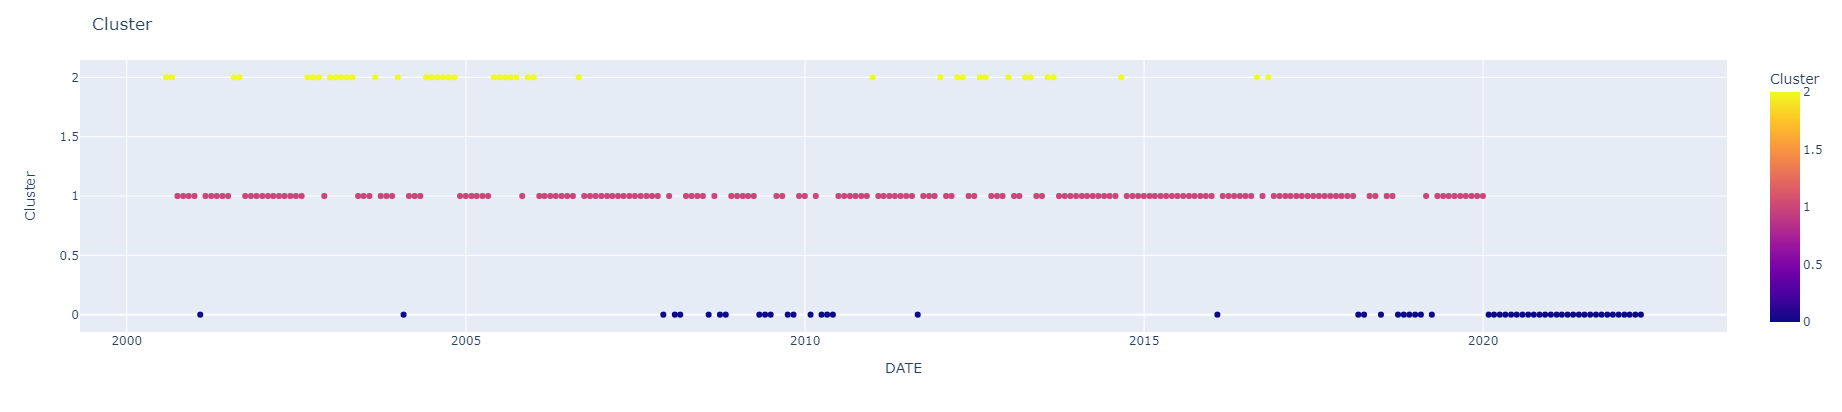

In [29]:
fig1 = px.scatter(df_ECON, x=df_ECON.index, y="Cluster", color="Cluster"
                )
fig1.update_layout(title="Cluster")
fig1.show()

In [30]:
# Let us test different values of k
import numpy as np
interia_scores = []

for test_k in sorted(set(np.random.randint(2,250,20))):
    print("Test k:", test_k)
    
    tmp_model = MiniBatchKMeans(
        n_clusters=test_k,  
        n_init=16, max_iter=2048, tol=0.5, reassignment_ratio=0.5
    )
    tmp_model.fit(df_ECON)
    
    score = tmp_model.inertia_
    interia_scores.append((test_k, score))

Test k: 7
Test k: 27
Test k: 33
Test k: 52
Test k: 56
Test k: 59
Test k: 68
Test k: 92
Test k: 95
Test k: 110
Test k: 117
Test k: 133
Test k: 163
Test k: 192
Test k: 195
Test k: 201
Test k: 215
Test k: 231


In [31]:
intertia_df = pd.DataFrame(interia_scores, columns=["k", "score"])

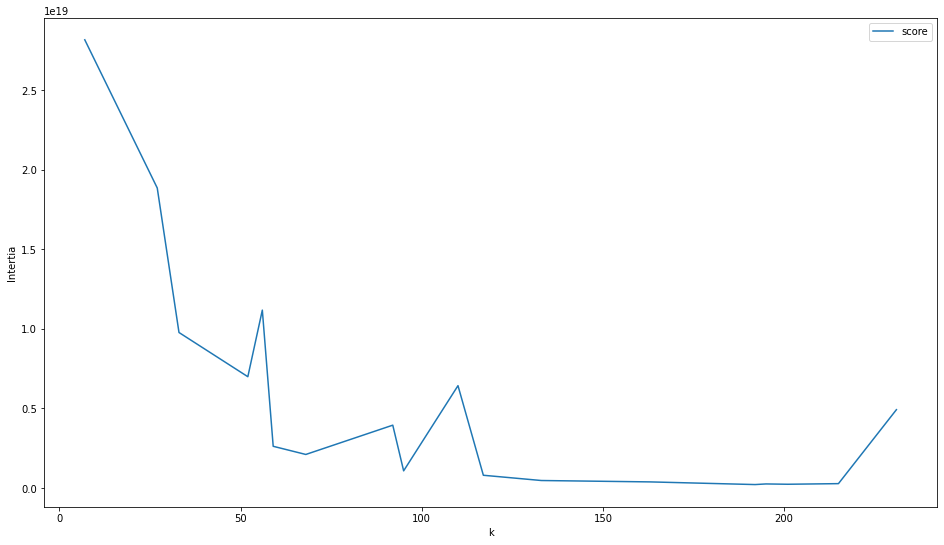

In [32]:
fig = plot.figure(figsize=(16,9))
ax = fig.add_subplot(1,1,1)

intertia_df.sort_values(by="k").plot("k", "score", ax=ax)

ax.set_ylabel("Intertia")

plot.show()